In [42]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
### Lets load the Boston House Pricing Dataset
from sklearn.datasets import load_boston

In [44]:
boston_data=load_boston()

In [45]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [46]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
df=pd.DataFrame(data=boston_data['data'],columns=boston_data['feature_names'])

In [48]:
target=pd.DataFrame(data=boston_data['target'],columns=['Target'])

In [49]:
df['Price']=target

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
#Summerizing the stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
### Missing value checking
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

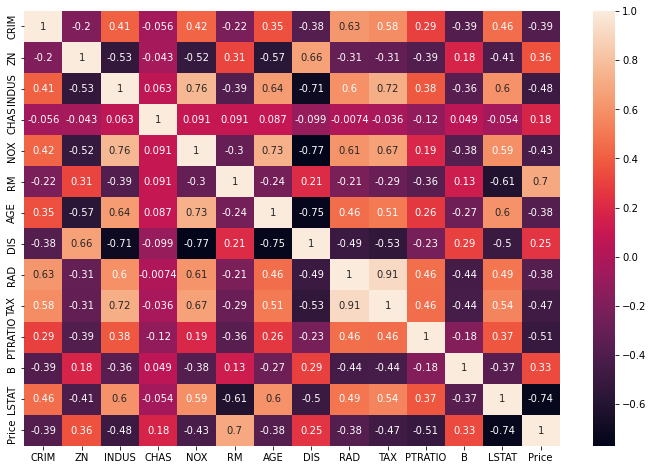

In [54]:
###EDA
###Correlation-Check for multicoolinearity..
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Assumptions

<AxesSubplot:xlabel='RM', ylabel='Price'>

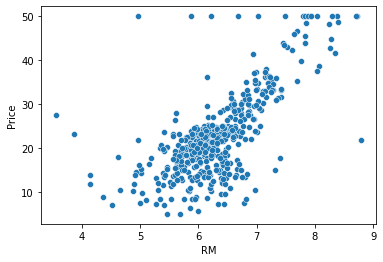

In [79]:
sns.scatterplot(x=df['RM'],y=df['Price'])

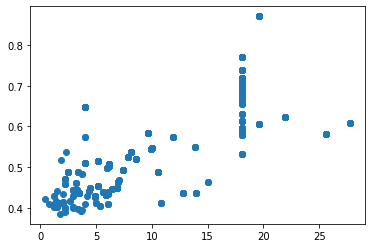

In [55]:
##scatterplot for cheching multicoolinearity..
plt.scatter(x=df['INDUS'],y=df['NOX'])

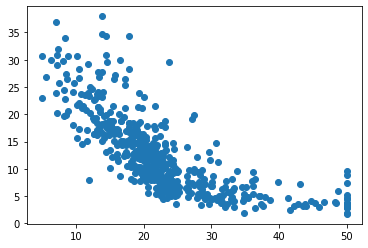

In [56]:
plt.scatter(x=df['Price'],y=df['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='Price'>

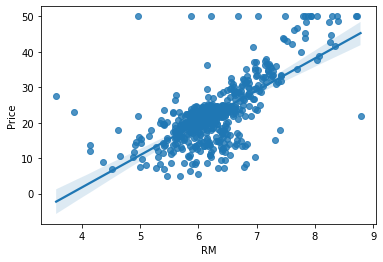

In [57]:
#Regrassion Plot
sns.regplot(x='RM',y='Price',data=df)

<AxesSubplot:xlabel='Price', ylabel='LSTAT'>

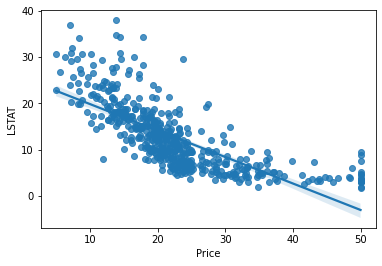

In [58]:
sns.regplot(x=df['Price'],y=df['LSTAT'])

In [59]:
### Independent and Dependent Features
X=df.drop(columns=['Price'])
y=df['Price']

In [60]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
### Standardizing the Dataset : Purpose> It helps to reach to the point of convergence much faster..
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [63]:
X_train=scalar.fit_transform(X_train)

In [64]:
X_test=scalar.transform(X_test)

In [65]:
## Model Training..
from sklearn.linear_model import LinearRegression

In [66]:
model=LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression()

In [68]:
## Intercept and Coefficient Checking
print(model.intercept_)

23.01581920903955


In [69]:
print(model.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [70]:
#To check the parameters on which our model has been trained..
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [80]:
### Prediction with Test Data.
pred=model.predict(X_test)
pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


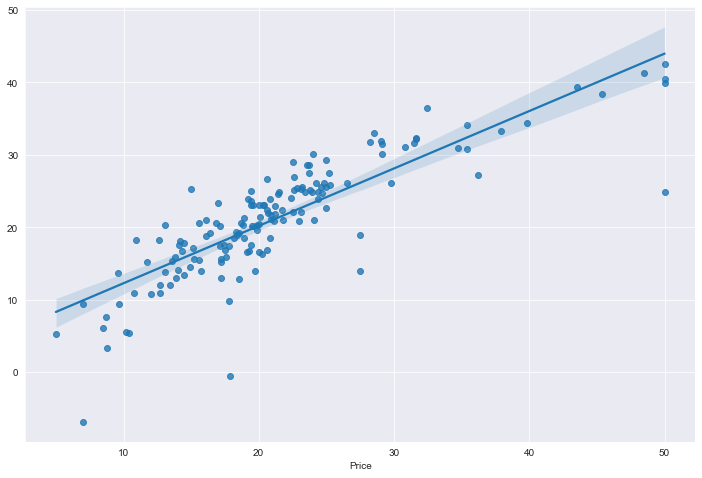

In [85]:
#Checking performance of model through Scatter Plot..
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.regplot(y_test,pred)
plt.show()

In [86]:
## Residuals/Errors Checking
residuals=pred-y_test

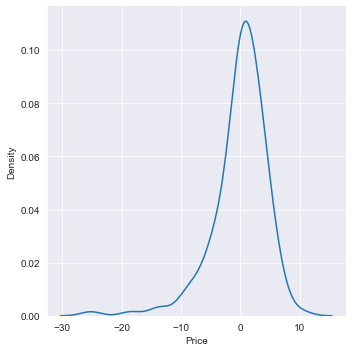

In [88]:
##Comparing the residuals graphically..
sns.displot(residuals,kind='kde')

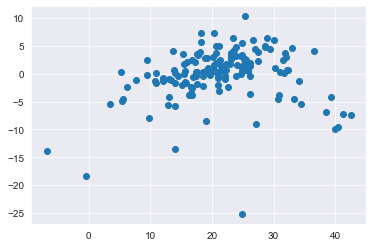

In [90]:
### Scatter Plot with respect to prediction and residuals..
plt.scatter(pred,residuals)

In [91]:
### Performance Checking..
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


### Performance Checking through : R^2 and adjusted R^2

> Formula

- R^2 = 1-SSR/SST
- R^2= Coefficient of determination SSR= sum of squares of residuals SST = total sum of squares

- Adjusted R^2 =1[(1-R^2)*(n-1)/(n-k-1)]
- where R^2:The R^2 pf the model n: The number of observations k: The number of predictor variables

In [93]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
print(score)

0.7112260057484932


In [94]:
#Adjusted R^2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639308

### New Data Prediction

In [96]:
boston_data['data'][0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [97]:
boston_data['data'][0].shape

(13,)

In [98]:
boston_data['data'][0].reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [101]:
new_trans_data=scalar.transform(boston_data['data'][0].reshape(1,-1))

In [104]:
round(model.predict(new_trans_data)[0],2)

30.09

### Pickling The Model file for Deployment

In [105]:
import pickle

In [106]:
pickle.dump(model,open('linear_model.pkl','wb'))

In [107]:
pickle.dump(scalar,open('scalar_model.pkl','wb'))

- **Pickle object testing.**

In [108]:
pickled_model=pickle.load(open('linear_model.pkl','rb'))

In [109]:
pickled_model.predict(new_trans_data)

array([30.08649576])